<a href="https://colab.research.google.com/github/Franklinyeruan/SSRI_Classification/blob/main/K_Fold_CV_Stacked_Conv_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Hello There! 
Below is the code for the paper "Links Between Antidepressant Use and Physical Movement: Deep Learning Within Ambulatory Actigraphy Data" 

## K-Fold CV Stacked Conv-LSTM Model 

# Set up and Installation

Import Libraries

In [ ]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf
import os

# Sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

# Keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.metrics import AUC

# Tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import random

Seed

In [ ]:
# Random Seed Generation
r1 = random.randint(0,100)
r2 = random.randint(0,100)

# Set Random Seed
random.seed(r1)
tf.random.set_seed(r2)

TPU configuration: Ensure that you are connected to a TPU. 

In [ ]:
# @title TPU Configuration
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

# ----------
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

with tf.device('/TPU:0'):
  c = tf.matmul(a, b)

print("c device: ", c.device)
print(c)
# ----------

strategy = tf.distribute.TPUStrategy(resolver)

# ----------
@tf.function
def matmul_fn(x, y):
  z = tf.matmul(x, y)
  return z

z = strategy.run(matmul_fn, args=(a, b))
print(z)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.76.78.114:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.76.78.114:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]
c device:  /job:worker/replica:0/task:0/device:TPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)
INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


PerReplica:{
  0: tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32),
  1: tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32),
  2: tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32),
  3: tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32),
  4: tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32),
  5: tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32),
  6: tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32),
  7: tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)
}


# Data Processing 

Load Data. Please ensure you are mounted to Google Drive

In [ ]:
# Load Data X
Wide_X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Heinz SSRI Classification/Data/All_Smooth_Wide_X.csv')

In [ ]:
# Process X --------

# Drop Unnamed Column 
Wide_X = Wide_X.drop("Unnamed: 0", axis = 1)
data_wide = Wide_X

# Standard Scalar
scaler = StandardScaler()
scaler.fit(data_wide)
data_wide = scaler.transform(data_wide)

# Convert DF to array
data_wide = np.array(data_wide)

In [ ]:
# Load Data Y
Y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Heinz SSRI Classification/Data/All_Smooth_Y.csv')

In [ ]:
# Process Y --------
# Drop Unnamed Column 
Y = Y.drop("Unnamed: 0", axis = 1)
Y.head()

# Change to Y Float 
Y['SSRI'] = Y['Medication'].apply(lambda x: float(x)) 

#Make y array as well 
y = np.hstack(np.asarray(Y.SSRI)).reshape(len(Y),1)

In [ ]:
# Shape Analysis 
print("shape of X:", data_wide.shape)
print("shape of y:", y.shape)

shape of X: (7162, 10080)
shape of y: (7162, 1)


Create a held out test set

In [ ]:
# Train Test Split (keep random state in check)
X_train, X_test, y_train, y_test = train_test_split(data_wide, y, test_size=0.2, stratify=y, random_state = 19)

# Dimentions
n_steps, n_length, n_width = 7, 24, 60  
n_features = 1 

# Reshape Train and Test 
X_train = X_train.reshape((X_train.shape[0], n_steps, n_length, n_width, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, n_length, n_width, n_features))

Graphical Analysis 

day: 1


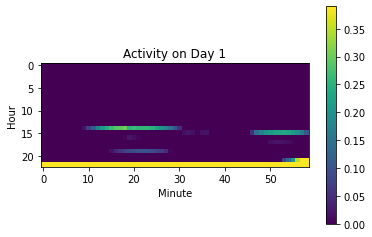

day: 2


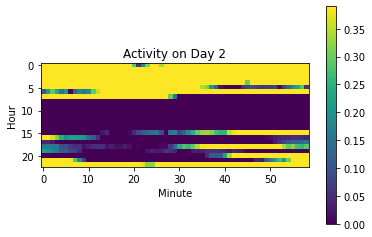

day: 3


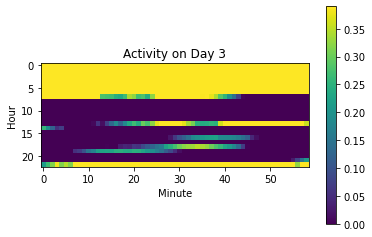

day: 4


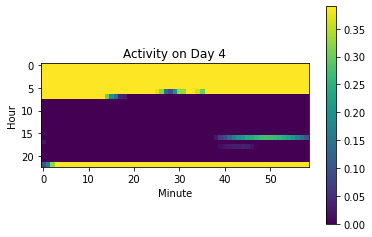

day: 5


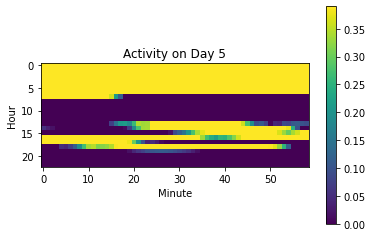

day: 6


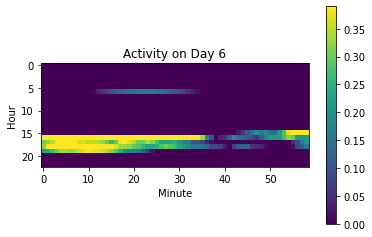

day: 7


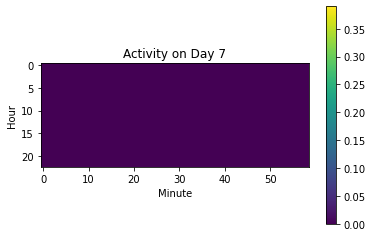

In [ ]:
for day in range(0,7):
  sli = X_train[11, day, 0:23, 0:59, 0]
  print("day:", day + 1)
  plt.imshow(sli, interpolation='none', vmin=0, vmax=.39)
  plt.colorbar(orientation='vertical')
  plt.title("Activity on Day " + str(day+1))
  plt.xlabel("Minute")
  plt.ylabel("Hour")
  plt.show()

# Model Architecture 

Import certain files from Keras 

In [ ]:
# Import Layers
from keras.layers import ConvLSTM2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.convolutional import MaxPooling3D

In [ ]:
# Model Structure
def create_model():
  model = Sequential()
  
  # Conv Layers 
  model.add(ConvLSTM2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(n_steps, n_length, n_width, n_features) ,return_sequences=True) )
  model.add(Activation('relu'))
  model.add(MaxPooling3D(pool_size=(1, 2, 2)))
  model.add(ConvLSTM2D(filters=64, kernel_size=(2, 2), padding='valid', return_sequences= False))

  # Feed Forward Layers 
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(tf.keras.layers.Dropout(rate=0.2))
  model.add(Dense(100, activation='relu'))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  return model

# Model Compilation & Fitting 

In [ ]:
# Compile the model -----
with strategy.scope():
  # Create the model we defined above
  model = create_model()
  # Compile 
  model.compile(
    # Metrics 
    loss= tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics= tf.keras.metrics.AUC(name='auc'),
    # Optimizer 
    optimizer= tf.keras.optimizers.Adam(
      learning_rate=0.00001,
      beta_1=0.9,
      beta_2=0.999,
      epsilon=1e-07,
      amsgrad=False,
    )
)
  
model.save_weights("/content/drive/MyDrive/Colab Notebooks/Heinz SSRI Classification/Final Model /Clean Models/base_model_weights.h5")

def reset_model():
  model.load_weights("/content/drive/MyDrive/Colab Notebooks/Heinz SSRI Classification/Final Model /Clean Models/base_model_weights.h5")
  

Set Parameters 

In [ ]:
# Params ----------
# Balance Weights 
class_weights = {0: (266/7162),  # Custom Setting Class Weights 
                1: (6896/7162)}

# Early Stopping 
callback = tf.keras.callbacks.EarlyStopping(monitor='val_auc',
                                            patience=90,
                                            restore_best_weights=True,                                       
                                            )

Fit the model

In [ ]:
# Fit the Model 
def fit_model(X_training, y_training, X_val, y_val):
  model.fit(
      X_training, y_training,
      epochs= 500, 
      batch_size= 64,  
      validation_data = (X_val, y_val), 
      shuffle=False,
      class_weight=class_weights,
      callbacks = [callback],
      verbose = 2
  )

In [ ]:
# Save the model 
def save_model(count):
  model.save("/content/drive/MyDrive/Colab Notebooks/Heinz SSRI Classification/Final Model /Clean Models/Saved CV Model weights/full_model_" + str(count) + ".h5")
  model.save_weights("/content/drive/MyDrive/Colab Notebooks/Heinz SSRI Classification/Final Model /Clean Models/Saved CV Model weights/weights_" + str(count) + ".hdf5")

In [ ]:
# Model Evaluation
def model_eval():
  print(" \n-\n-\n-\n-\n-\n-\n-\n-\n-\ntest set:")
  scores = model.evaluate(X_test, y_test, batch_size=64) # Test Set
  cv_test_scores.append(scores[1])
  print(" \n-\n-\n-\n-\n-\n-\n-\n-\n-\nval set:")
  scores = model.evaluate(X_val, y_val, batch_size=64)  # Validation Set
  cv_val_scores.append(scores[1])

In [ ]:
# Save all predictions and file
def save_files(count):
  # Preds
  pred_filepath = "/content/drive/MyDrive/Colab Notebooks/Heinz SSRI Classification/Final Model /Clean Models/Prediction Files"
  np.save(pred_filepath + "/y_pred_test_" + str(count) + ".npy", X_test, allow_pickle=True)
  np.save(pred_filepath + "/y_pred_val_" + str(count) + ".npy", X_val, allow_pickle=True)

  # Train
  train_filepath = "/content/drive/MyDrive/Colab Notebooks/Heinz SSRI Classification/Final Model /Clean Models/Training files"
  np.save(train_filepath + "/X_train_" + str(count) + ".npy", X_training, allow_pickle=True)
  np.save(train_filepath + "/y_train_" + str(count) + ".npy", y_training, allow_pickle=True)

  # Test 
  test_filepath = "/content/drive/MyDrive/Colab Notebooks/Heinz SSRI Classification/Final Model /Clean Models/Testing Files"
  np.save(test_filepath + "/X_test_" + str(count) + ".npy", X_test, allow_pickle=True)
  np.save(test_filepath + "/y_test_" + str(count) + ".npy", y_test, allow_pickle=True)

  # Validation
  val_filepath = "/content/drive/MyDrive/Colab Notebooks/Heinz SSRI Classification/Final Model /Clean Models/Validation Files"
  np.save(val_filepath + "/X_val_" + str(count) + ".npy", X_val, allow_pickle=True)
  np.save(val_filepath + "/y_val_" + str(count) + ".npy", y_val, allow_pickle=True)


# 10-Fold Cross Validation

In [ ]:
#@title K-Fold CV Model 
%%time
from sklearn.model_selection import StratifiedKFold

# Global Score List Buckets
cv_test_scores=[]
cv_val_scores=[]

# K fold parameters 
seed = 7
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

# run K-fold 
count = 1
for train, val in kfold.split(X_train, y_train):
  
  # Create New Training Set 
  X_training = X_train[train]
  y_training = y_train[train]
  # Create new Validation Sets 
  X_val = X_train[val]
  y_val = y_train[val]

  # Reset model 
  print("Resetting model..")
  reset_model()
  # Fit model
  fit_model(X_training, y_training, X_val, y_val)
  # Eval model 
  model_eval()
  # Save model 
  print("Saving model...")
  save_model(count)
  # Save files
  print("Saving files...")
  save_files(count)

  # increment 
  print("FINISHED CYCLE NUMBER:", count)
  count += 1 

# Score Eval
print("\nCV Test AUC----------------------------")
print("Individual scores:", cv_test_scores)
print("Mean:", np.mean(cv_test_scores))
print("std:", np.std(cv_test_scores))
print("\nCV Val AUC-----------------------------")
print("Individual scores:", cv_val_scores)
print("Mean:", np.mean(cv_val_scores))
print("std:", np.std(cv_val_scores))




Resetting model..
Epoch 1/500
Instructions for updating:
use `experimental_local_results` instead.


Instructions for updating:
use `experimental_local_results` instead.


81/81 - 33s - loss: 0.0491 - auc: 0.5819 - val_loss: 0.6488 - val_auc: 0.5559 - 33s/epoch - 405ms/step
Epoch 2/500
81/81 - 8s - loss: 0.0480 - auc: 0.6563 - val_loss: 0.6266 - val_auc: 0.5469 - 8s/epoch - 97ms/step
Epoch 3/500
81/81 - 8s - loss: 0.0472 - auc: 0.6633 - val_loss: 0.6273 - val_auc: 0.5456 - 8s/epoch - 98ms/step
Epoch 4/500
81/81 - 8s - loss: 0.0468 - auc: 0.6663 - val_loss: 0.6315 - val_auc: 0.5434 - 8s/epoch - 97ms/step
Epoch 5/500
81/81 - 8s - loss: 0.0466 - auc: 0.6663 - val_loss: 0.6374 - val_auc: 0.5440 - 8s/epoch - 97ms/step
Epoch 6/500
81/81 - 8s - loss: 0.0462 - auc: 0.6695 - val_loss: 0.6372 - val_auc: 0.5441 - 8s/epoch - 97ms/step
Epoch 7/500
81/81 - 8s - loss: 0.0462 - auc: 0.6690 - val_loss: 0.6396 - val_auc: 0.5442 - 8s/epoch - 97ms/step
Epoch 8/500
81/81 - 8s - loss: 0.0460 - auc: 0.6706 - val_loss: 0.6421 - val_auc: 0.5448 - 8s/epoch - 98ms/step
Epoch 9/500
81/81 - 8s - loss: 0.0458 - auc: 0.6723 - val_loss: 0.6398 - val_auc: 0.5465 - 8s/epoch - 97ms/step
E

#Note for future 
- Analyze hdf5 files for SHAP analysis
- Analyze data files (pred, train, test, val) 